In [151]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import cv2 as cv

image = cv.imread('mamo.jpg')
image.shape

(570, 400, 3)

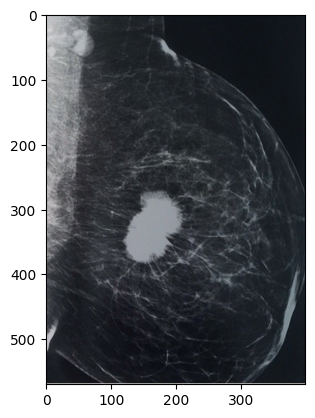

In [152]:
plt.imshow(image)

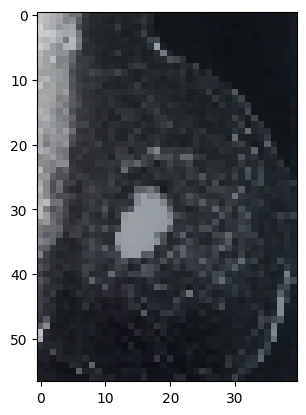

In [153]:
scale=10
plt.imshow(cv.resize(image, (int(len(image[0])/scale), int(len(image)//scale))))

### Piramit ile Resize Yöntemi

In [154]:
def pyramid(image, scale=1.5, minSize=(20, 20)):
    yield image
    while True:
        w = int(image.shape[1] / scale)
        image = cv.resize(image, (w, w))
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        yield image

0 (570, 400, 3)
1 (266, 266, 3)
2 (177, 177, 3)
3 (118, 118, 3)
4 (78, 78, 3)
5 (52, 52, 3)


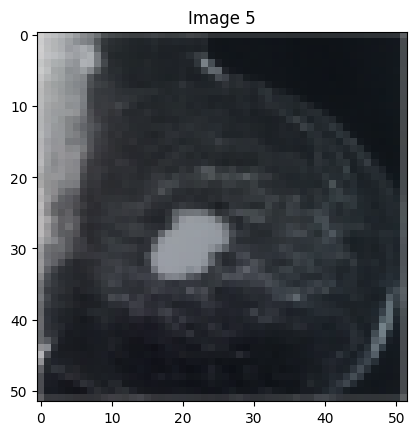

6 (34, 34, 3)
7 (22, 22, 3)


In [155]:
c_1=image.copy()
for i, c_1 in enumerate(pyramid(image)):
    print(i, c_1.shape)
    if i == 5:
        plt.title('Image 5')
        plt.imshow(c_1)
        plt.show()


### Sliding Window Kernel

In [156]:
def sliding_window(image, step, ws):
    for y in range(0, image.shape[0]-ws[1], step):
        for x in range(0, image.shape[1]-ws[0], step):
            yield (x, y, image[y:y+ws[1], x:x+ws[0]])

0 0 0
1 20 0
2 40 0
3 60 0
4 80 0
5 0 20
6 20 20
7 40 20
8 60 20
9 80 20
10 0 40
11 20 40
12 40 40
13 60 40
14 80 40
15 0 60
16 20 60
17 40 60
18 60 60
19 80 60
20 0 80


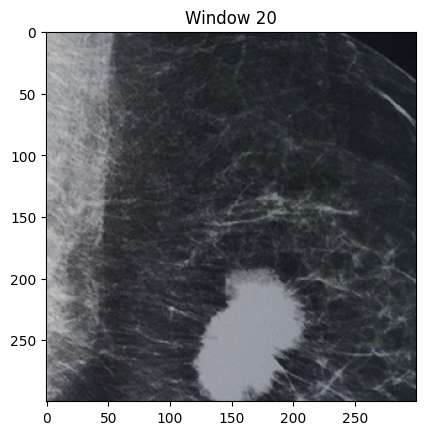

21 20 80
22 40 80
23 60 80
24 80 80
25 0 100
26 20 100
27 40 100
28 60 100
29 80 100
30 0 120
31 20 120
32 40 120
33 60 120
34 80 120
35 0 140
36 20 140
37 40 140
38 60 140
39 80 140
40 0 160
41 20 160
42 40 160
43 60 160
44 80 160
45 0 180
46 20 180
47 40 180
48 60 180
49 80 180
50 0 200
51 20 200
52 40 200
53 60 200
54 80 200
55 0 220
56 20 220
57 40 220
58 60 220
59 80 220
60 0 240
61 20 240
62 40 240
63 60 240
64 80 240
65 0 260
66 20 260
67 40 260
68 60 260
69 80 260


In [157]:
c_2=image.copy()
im = sliding_window(c_2, 20, (300, 300))
for i, window in enumerate(im):
    print(i, window[0], window[1])
    if i == 20:
        plt.title('Window '+str(i))
        plt.imshow(window[2])
        plt.show()

In [158]:
def non_maximum_surpression(boxes, overlapThresh):
    if len(boxes) == 0:
        return []
    if boxes.dtype.kind == 'i':
        boxes = boxes.astype('float')
    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    
    area = (x2-x1+1) * (y2-y1+1)
    idxs = np.argsort(y2)
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        w = np.maximum(0, xx2-xx1+1)
        h = np.maximum(0, yy2-yy1+1)
        overlap = (w*h) / area[idxs[:last]]
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))
    return boxes[pick].astype('int')

In [169]:
boxes =[]
for i in sliding_window(image, 50, (300, 300)):
    boxes.append((i[0], i[1], i[0]+75, i[1]+75))
boxes = np.array(boxes)

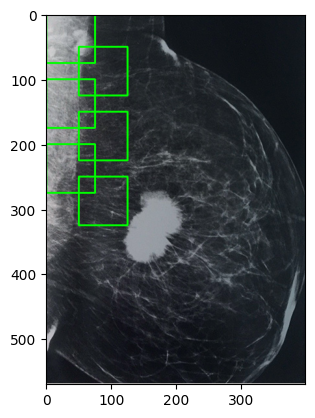

In [170]:
clone = image.copy()
for i in non_maximum_surpression(boxes, 0.3):
    cv.rectangle(image, (i[0], i[1]), (i[2], i[3]), (0, 255, 0), 2)
plt.imshow(image)